In [19]:
%reload_ext autoreload
%autoreload 2
%pylab inline
%matplotlib inline

import pandas as pd
import numpy as np
import pylab as pl
import scipy as sp
import sys
import os 
import seaborn as sns
from scipy import stats
from box import Box
import warnings

from IPython.core.display import display, HTML

warnings.simplefilter('ignore')

#TOP = "/ccte/home2/ttate/genra-ltea"
TOP = "/". join(os.getcwd().split('/')["-2"])+'/'
LIB = TOP+'genra'
if not LIB in sys.path:
    sys.path.insert(0, LIB)
    
os.environ['genra-py']=LIB

DATA_DIR = TOP +'/data/'
FIG_DIR = TOP +'/figs/'

Populating the interactive namespace from numpy and matplotlib


LTEA Data

chm, bio, tox, and chem clusters

In [20]:
D1 = TOP+'/data/ltea-2020/'

In [21]:
CHM1 = pd.read_csv(D1+'S7-chem.tsv', sep='\t')
#morgan, torsion, and toxprints 
TOX1 = pd.read_csv(D1+'S1-tox.tsv', sep='\t')
#toxref db v2 query 4.2020
BIO1 = pd.read_csv(D1+'S2-bio.tsv', sep='\t') 
#ltea group gene and assay level bio data
#BIO2 = pd.read_csv(D1+'S3-bio.tsv', sep='\t')
#ltea gene level bio data
CLS1 = pd.read_csv(D1+'S3-clust.tsv', sep='\t')

In [22]:
CLS1.head()

,cl_id,DTXSID,PREFERRED_NAME,DTXCID,CASRN
1,0,DTXSID3031860,Perfluorodecanoic acid,DTXCID1011860,335-76-2
2,0,DTXSID3031862,Perfluorohexanoic acid,DTXCID1011862,307-24-4
3,0,DTXSID8031863,Perfluorononanoic acid,DTXCID6011863,375-95-1
4,0,DTXSID3031864,Perfluorooctanesulfonic acid,DTXCID1011864,1763-23-1
5,0,DTXSID8031865,Perfluorooctanoic acid,DTXCID6011865,335-67-1


Organizing Chemical Data 
    -Chemical names:DTXSID, preferred_name
    -toxprints: toxp_*
    -morgan fps: mrgn_*
    -topological torsion fps: tptr_*

In [130]:
CHM1.head()

,DTXSID,PREFERRED_NAME,toxp_atom:element_main_group,toxp_atom:element_metal_group_I_II,toxp_atom:element_metal_group_III,toxp_atom:element_metal_metalloid,toxp_atom:element_metal_poor_metal,toxp_atom:element_metal_transistion_metal,toxp_atom:element_noble_gas,toxp_bond:C#N_cyano_acylcyanide,...,tptr_2038,tptr_2039,tptr_2040,tptr_2041,tptr_2042,tptr_2043,tptr_2044,tptr_2045,tptr_2046,tptr_2047
0,DTXSID9020035,Aflatoxin B1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,DTXSID2020260,Chenodeoxycholic acid,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,DTXSID2021735,Dimethyl sulfoxide,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,DTXSID8041030,Fenofibric acid,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,DTXSID6021080,Omeprazole,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
CHM1 = CHM1.replace(['-'], np.nan)

In [24]:
CHM1.isnull().values.any()

True

In [25]:
#set([i[0] for i in CHM1.columns.str.split('_')])
CHM1_nm = CHM1[['DTXSID', 'PREFERRED_NAME']].set_index('DTXSID')
X = CHM1 = CHM1.drop(['PREFERRED_NAME'], axis=1).set_index('DTXSID')

CHM11 = Box()
for i in set([i[0] for i in X.columns.str.split('_') ]):
    CHM11[i] =  X[X.columns[X.columns.str.match(i)]]

In [26]:
CHM11.mrgn.head()

,mrgn_0,mrgn_1,mrgn_2,mrgn_3,mrgn_4,mrgn_5,mrgn_6,mrgn_7,mrgn_8,mrgn_9,...,mrgn_2038,mrgn_2039,mrgn_2040,mrgn_2041,mrgn_2042,mrgn_2043,mrgn_2044,mrgn_2045,mrgn_2046,mrgn_2047
DTXSID,,,,,,,,,,,,,,,,,,,,,
DTXSID9020035,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DTXSID2020260,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
DTXSID2021735,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DTXSID8041030,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
DTXSID6021080,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Organizing Biological data

gene_* gene level bio data
assay_* assay level bio data

In [27]:
BIO1.head()

,dsstox_substance_id,casn,chnm,gene_ABCB1,gene_ABCB11,gene_ABCC2,gene_ABCC3,gene_ABCG2,gene_ACLY,gene_ACOX1,...,assay_TNFRSF1A_dn,assay_TNFRSF1A_up,assay_TP53_dn,assay_TP53_up,assay_UGT1A1_dn,assay_UGT1A1_up,assay_UGT1A6_dn,assay_UGT1A6_up,assay_XBP1_dn,assay_XBP1_up
0,DTXSID6024177,10265-92-6,Methamidophos,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,DTXSID1021877,107-07-3,2-Chloroethanol,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,DTXSID1038298,5315-79-7,1-Hydroxypyrene,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
3,DTXSID1032569,23103-98-2,Pirimicarb,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,DTXSID2024793,2675-77-6,Chloroneb,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [28]:
BIO1 = BIO1.rename(columns = {'dsstox_substance_id':'DTXSID'})

In [29]:
BIO1.isnull().values.any()
BIO1.isnull().sum().sum()

11586

In [30]:
BIO1 = BIO1.dropna()
BIO1.shape

(98, 287)

In [31]:
BIO1 = BIO1.drop(['chnm', 'casn'], axis = 1).set_index('DTXSID')
#set([i[0] for i in BIO1.columns.str.split('_')])

BIO11 = Box()
for i in set([i[0] for i in BIO1.columns.str.split('_')]):
    BIO11[i]=BIO1[BIO1.columns[BIO1.columns.str.match(i)]]

In [32]:
list(BIO11.keys())

['gene', 'assay']

BIO Gene Level Data

In [14]:
#BIO2 = BIO2.rename(columns = {'dsstox_substance_id':'DTXSID'})

#BIO2 = BIO2.drop(['chnm', 'casn'], axis = 1).set_index('DTXSID')
#set([i[0] for i in BIO1.columns.str.split('_')])

#BIO12 = Box()
#for i in set([i[0] for i in BIO2.columns.str.split('_')]):
 #   BIO12[i]=BIO2[BIO2.columns[BIO2.columns.str.match(i)]]

In [ ]:
#BIO2.head()

In [ ]:
#list(BIO12.keys())

Organizing Tox Data

In [33]:
TOX1.head()

,dsstox_substance_id,preferred_name,acu_calcium,acu_clinical_signs,acu_intestine_large,acu_intestine_small,acu_lung,acu_mortality,acu_stomach,chr_5._nucleotidase,...,sub_ureter,sub_urethra,sub_uric_acid,sub_urinary_bladder,sub_urobilinogen,sub_uterus,sub_vagina,sub_volume,sub_water_consumption,sub_zinc
1,DTXSID0020151,Benzyl acetate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,DTXSID0020232,Caffeine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,DTXSID0020311,Monuron,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,DTXSID0020315,Chloropicrin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,DTXSID0020319,Chlorothalonil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
TOX1 = TOX1.rename(columns = {'dsstox_substance_id':'DTXSID'})
#TOX1 = TOX1.replace(['-'], np.nan)

In [35]:
TOX1 = TOX1.drop(['preferred_name'], axis=1).set_index('DTXSID')
#set([i[0] for i in TOX1.columns.str.split('_')])
TOX11 = Box()
for i in set([i[0] for i in TOX1.columns.str.split('_')]):
    TOX11[i] = TOX1[TOX1.columns[TOX1.columns.str.match(i)]]

In [36]:
list(TOX11.keys())

['sac', 'chr', 'dev', 'rep', 'neu', 'mgr', 'sub', 'oth', 'acu', 'dnt']

Liver Effects

In [37]:
TOX1.columns[TOX1.columns.str.find('liver')>-1]

Index(['chr_liver', 'dev_liver', 'dev_premature_delivery', 'dnt_liver',
       'mgr_liver', 'neu_liver', 'oth_liver', 'rep_liver', 'sac_liver',
       'sub_liver'],
      dtype='object')

In [38]:
CHM11.mrgn.shape

(1022, 2048)

In [176]:
#z = CHM11.mrgn.index.intersection(Y.index)
#z

Analysis: CHR liver 
   Chronic Liver toxicity data and morgan chemical structure descriptors

In [39]:
Y = TOX1.chr_liver.dropna()
INT=CHM11.mrgn.index.intersection(Y.index).dropna()
if len(INT)>0:
    Yf = Y.copy()[INT]
    Yf[Yf>0]=1
    Yb=Yf.copy()
    Yb = Yb.astype(np.int)
    X = CHM11.mrgn.loc[INT]
else:
    pass
    

#Yf = Y.copy()
#Yf[Yf>0]=1
#Yb= Yf.copy()
#Yb = Yb.astype(np.int)
#I=CHM11.mrgn.index.intersection(Y.index)
#if len(I)>0:
 #   X = CHM11.mrgn.loc[I]
#else:
 #   pass
        
X.shape, Y.shape, Yf.shape, Yb.shape

((366, 2048), (516,), (366,), (366,))

In [40]:
Yb.value_counts()

1    237
0    129
Name: chr_liver, dtype: int64

Global Analysis 
--Global analysis based on all the data, ignoring clusters. 
--Uses 5 nearest neighbors and score using ROC AUC analysis

In [41]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, roc_auc_score
from genra.rax.skl.reg import *

Scorer1 = {
    'AUC':make_scorer(roc_auc_score),
}
GCO = GenRAPredValue(n_neighbors=5, algorithm='brute', metric='jaccard', n_jobs=2)

P = pd.DataFrame(cross_validate(GCO, X, Yb, cv=5, scoring=Scorer1))
R1 = pd.DataFrame(dict(mn=P.mean(), sd=P.std()))
R1

,mn,sd
fit_time,0.013319,0.001080
score_time,0.091505,0.023613
test_AUC,0.623468,0.084449


In [26]:
from genra.rax.skl.reg import GenRAPredValue
from sklearn.metrics import make_scorer,explained_variance_score,roc_auc_score,r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut

#KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, 
#                     metric=’minkowski’, metric_params=None, n_jobs=1)[source]

GC1 = GenRAPredValue(algorithm='brute')

params={'n_neighbors': range(1,15),
        'metric':['euclidean','jaccard','manhattan']
       }


Grid3= GridSearchCV(estimator=GC1,param_grid=params,
                    n_jobs=-1,cv=5,#LeaveOneOut(),
                    verbose=1,
                    scoring=make_scorer(roc_auc_score))

Best3=Grid3.fit(X,Yb)
Best3.best_score_,Best3.best_params_

Fitting 5 folds for each of 42 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   28.1s
[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:   29.4s finished


(0.6447643609162943, {'metric': 'jaccard', 'n_neighbors': 8})

Local Predict Value
Use leave out cross validation the get GenRA prediction for each chemical

In [27]:
from sklearn.model_selection import cross_validate,LeaveOneOut
from sklearn.metrics import make_scorer,roc_auc_score,r2_score
from genra.rax.skl.reg import *


GC1 = GenRAPredValue(n_neighbors=8,algorithm='brute',metric='jaccard',n_jobs=3)

Loo = LeaveOneOut()
Loo.get_n_splits(X)
R = []
I = []
for trn_idx,tst_idx in Loo.split(X):
    X_trn,X_tst = X.iloc[trn_idx],X.iloc[tst_idx]
    Y_trn,Y_tst = Yf.iloc[trn_idx],Yf.iloc[tst_idx]
    Y_p = GC1.fit(X_trn,Y_trn).predict(X_tst)
    I.append(tst_idx[0])
    R.append(Y_p[0])

Perf1 = pd.DataFrame(dict(DTXSID=X.iloc[I].index,Y_true=Yb.iloc[I],Y_pred=R))\
          .reset_index(drop=True)\
          .merge(CLS1,on='DTXSID')

Perf1.loc[:,'Y_true']=Perf1.Y_true.astype(np.uint)
Grp = Perf1[['cl_id','Y_true','Y_pred']].groupby('cl_id')

def my_roc_score(Tr,Pr):
    if len(Tr.unique())==1:
        return None
    else:
        return roc_auc_score(Tr,Pr)
    
Perf_Val=pd.DataFrame(dict(auc_score=Grp.apply(lambda x: my_roc_score(x.Y_true,x.Y_pred)),
                           r2_score=Grp.apply(lambda x: r2_score(x.Y_true,x.Y_pred))))

Perf_Val.sort_values('auc_score',ascending=False)

,auc_score,r2_score
cl_id,,
88,1.000000,0.373383
3,1.000000,0.516560
24,1.000000,0.193336
23,0.833333,0.371162
7,0.750000,0.239470
...,...,...
87,NaN,NaN
89,NaN,NaN
93,NaN,NaN


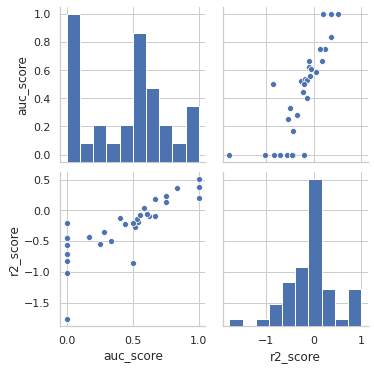

In [28]:
import seaborn as sns
sns.set(style='whitegrid')
sns.pairplot(Perf_Val)

Chr_liver with gene level bio data

In [150]:
Y = TOX1.chr_liver.dropna()
INT=BIO11.gene.index.intersection(Y.index)
if len(INT)>0:
    Yf = Y.copy()[INT]
    Yf[Yf>0]=1
    Yb=Yf.copy()
    Yb = Yb.astype(np.int)
    X = BIO11.gene.loc[INT]
else:
    pass
    

#Yf = Y.copy()
#Yf[Yf>0]=1
#Yb= Yf.copy()
#Yb = Yb.astype(np.int)
#I=CHM11.mrgn.index.intersection(Y.index)
#if len(I)>0:
 #   X = CHM11.mrgn.loc[I]
#else:
 #   pass
        
X.shape, Y.shape, Yf.shape, Yb.shape

((43, 95), (516,), (43,), (43,))

In [151]:
Yb.value_counts()

1    33
0    10
Name: chr_liver, dtype: int64

In [152]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, roc_auc_score
from genra.rax.skl.reg import *

Scorer1 = {
    'AUC':make_scorer(roc_auc_score),
}
GCO = GenRAPredValue(n_neighbors=5, algorithm='brute', metric='jaccard', n_jobs=2)

P = pd.DataFrame(cross_validate(GCO, X, Yb, cv=5, scoring=Scorer1))
R1 = pd.DataFrame(dict(mn=P.mean(), sd=P.std()))
R1

,mn,sd
fit_time,0.005330,0.000281
score_time,0.012546,0.001245
test_AUC,0.431706,0.346680


In [155]:
from sklearn.model_selection import cross_validate,LeaveOneOut
from sklearn.metrics import make_scorer,roc_auc_score,r2_score
from genra.rax.skl.reg import *


GC1 = GenRAPredValue(n_neighbors=8,algorithm='brute',metric='jaccard',n_jobs=3)

Loo = LeaveOneOut()
Loo.get_n_splits(X)
R = []
I = []
for trn_idx,tst_idx in Loo.split(X):
    X_trn,X_tst = X.iloc[trn_idx],X.iloc[tst_idx]
    Y_trn,Y_tst = Yf.iloc[trn_idx],Yf.iloc[tst_idx]
    Y_p = GC1.fit(X_trn,Y_trn).predict(X_tst)
    I.append(tst_idx[0])
    R.append(Y_p[0])

Perf1 = pd.DataFrame(dict(DTXSID=X.iloc[I].index,Y_true=Yb.iloc[I],Y_pred=R))\
          .reset_index(drop=True)\
          .merge(CLS1,on='DTXSID')

Perf1.loc[:,'Y_true']=Perf1.Y_true.astype(np.uint)
Grp = Perf1[['cl_id','Y_true','Y_pred']].groupby('cl_id')

def my_roc_score(Tr,Pr):
    if len(Tr.unique())==1:
        return None
    else:
        return roc_auc_score(Tr,Pr)
    
Perf_Val=pd.DataFrame(dict(auc_score=Grp.apply(lambda x: my_roc_score(x.Y_true,x.Y_pred)),
                           r2_score=Grp.apply(lambda x: r2_score(x.Y_true,x.Y_pred))))

Perf_Val.sort_values('auc_score',ascending=False)

,auc_score,r2_score
cl_id,,
31,0.500000,-0.290578
75,0.500000,0.070953
35,0.333333,-0.374053
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
7,NaN,NaN


Local Predict Class
Leave out each example to fit and predict

In [156]:
from sklearn.model_selection import cross_validate,LeaveOneOut
from sklearn.metrics import make_scorer,f1_score,accuracy_score,precision_score,recall_score
from genra.rax.skl.cls import *


GC0 = GenRAPredClass(n_neighbors=8,algorithm='brute',metric='jaccard',n_jobs=2)

Loo = LeaveOneOut()
Loo.get_n_splits(X)
R = []
I = []
for trn_idx,tst_idx in Loo.split(X):
    X_trn,X_tst = X.iloc[trn_idx],X.iloc[tst_idx]
    Y_trn,Y_tst = Yb.iloc[trn_idx],Yb.iloc[tst_idx]
    Y_p = GC0.fit(X_trn,Y_trn).predict(X_tst)
    I.append(tst_idx[0])
    R.append(Y_p[0])

Perf1 = pd.DataFrame(dict(DTXSID=X.iloc[I].index,Y_true=Yb.iloc[I],Y_pred=R))\
          .reset_index(drop=True)\
          .merge(CLS1,on='DTXSID')

Grp = Perf1[['cl_id','Y_true','Y_pred']].groupby('cl_id')

Perf_CLS=pd.DataFrame(dict(f1_score=Grp.apply(lambda x: f1_score(x.Y_true,x.Y_pred)),
                           sp_score=Grp.apply(lambda x: precision_score(x.Y_true,x.Y_pred)),
                           sn_score=Grp.apply(lambda x: recall_score(x.Y_true,x.Y_pred))))
                                                                             
Perf_CLS.sort_values('f1_score',ascending=False)

,f1_score,sp_score,sn_score
cl_id,,,
97,1.000000,1.000000,1.000000
19,1.000000,1.000000,1.000000
37,1.000000,1.000000,1.000000
2,1.000000,1.000000,1.000000
67,1.000000,1.000000,1.000000
28,1.000000,1.000000,1.000000
80,1.000000,1.000000,1.000000
20,1.000000,1.000000,1.000000
16,1.000000,1.000000,1.000000


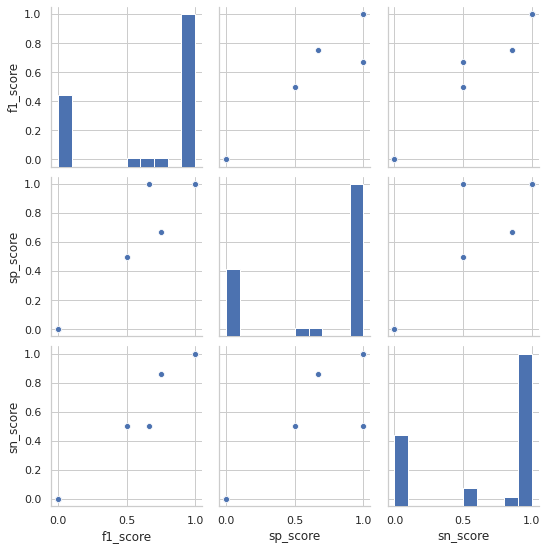

In [157]:
import seaborn as sns
sns.set(style='whitegrid')
sns.pairplot(Perf_CLS)

Local Predict Value
Leave out each example to fit and predict

In [158]:
from sklearn.model_selection import cross_validate,LeaveOneOut
from sklearn.metrics import make_scorer,explained_variance_score,roc_auc_score,r2_score
from genra.rax.skl.reg import *


GC1 = GenRAPredValue(n_neighbors=5,algorithm='brute',metric='jaccard',n_jobs=2)

Loo = LeaveOneOut()
Loo.get_n_splits(X)
R = []
I = []
for trn_idx,tst_idx in Loo.split(X):
    X_trn,X_tst = X.iloc[trn_idx],X.iloc[tst_idx]
    Y_trn,Y_tst = Yf.iloc[trn_idx],Yf.iloc[tst_idx]
    Y_p = GC1.fit(X_trn,Y_trn).predict(X_tst)
    I.append(tst_idx[0])
    R.append(Y_p[0])

Perf1 = pd.DataFrame(dict(DTXSID=X.iloc[I].index,Y_true=Yb.iloc[I],Y_pred=R))\
          .reset_index(drop=True)\
          .merge(CLS1,on='DTXSID')

Perf1.loc[:,'Y_true']=Perf1.Y_true.astype(np.uint)
Grp = Perf1[['cl_id','Y_true','Y_pred']].groupby('cl_id')

def my_roc_score(Tr,Pr):
    if len(Tr.unique())==1:
        return None
    else:
        return roc_auc_score(Tr,Pr)
    
Perf_Val=pd.DataFrame(dict(auc_score=Grp.apply(lambda x: my_roc_score(x.Y_true,x.Y_pred)),
                           r2_score=Grp.apply(lambda x: r2_score(x.Y_true,x.Y_pred)),
                           expvr_score=Grp.apply(lambda x: explained_variance_score(x.Y_true,x.Y_pred))))
                                                                             
Perf_Val.sort_values('auc_score',ascending=False)

,auc_score,r2_score,expvr_score
cl_id,,,
75,0.500000,-0.201549,-0.180903
35,0.380952,-0.240129,-0.209720
31,0.000000,-0.788844,-0.709999
1,NaN,NaN,1.000000
2,NaN,NaN,1.000000
3,NaN,NaN,1.000000
4,NaN,NaN,1.000000
5,NaN,NaN,1.000000
7,NaN,NaN,1.000000


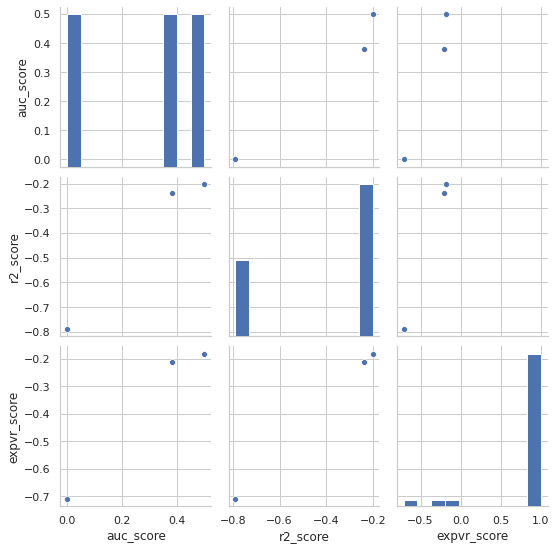

In [159]:
import seaborn as sns
sns.set(style='whitegrid')
sns.pairplot(Perf_Val)

Analyze all endpoints and descriptors

In [160]:
del(P)

In [161]:
from sklearn.model_selection import cross_validate,LeaveOneOut
from sklearn.metrics import make_scorer,explained_variance_score,roc_auc_score,r2_score
from genra.rax.skl.reg import *
import pdb

def loocv_evaluate(Est,X_in,Y_in,**kwargs):
    Loo = LeaveOneOut()
    Loo.get_n_splits(X_in)
    R = []
    I = []
    for trn_idx,tst_idx in Loo.split(X_in):
        X_trn,X_tst = X_in.iloc[trn_idx],X_in.iloc[tst_idx]
        Y_trn,Y_tst = Y_in.iloc[trn_idx],Y_in.iloc[tst_idx]
        Y_p = Est.fit(X_trn,Y_trn).predict(X_tst)
        I.append(tst_idx[0])
        R.append(Y_p[0])

    Perf = pd.DataFrame(dict(DTXSID=X_in.iloc[I].index,
                             Y_true=Y_in.iloc[I],
                             Y_pred=R))\
              .reset_index(drop=True)
    Perf.loc[:,'Y_true']=Perf.Y_true.astype(np.uint)
    
    return Perf

def my_roc_score(Tr,Pr):
    if len(Tr.unique())==1:
        return None
    else:
        I1 = np.logical_and(pd.notnull(Pr),pd.notnull(Tr))
        return roc_auc_score(Tr[I1],Pr[I1])
    
def run_genra_val(X,Y,Cls=pd.DataFrame(),n=8,j=3):    
    GCi = GenRAPredValue(n_neighbors=n,algorithm='brute',
                         metric='jaccard',n_jobs=j)
    P  = loocv_evaluate(GCi,X,Y).dropna()
    if Cls.shape[0]>0:
        P   = P.merge(Cls,on='DTXSID')
        Grp = P[['cl_id','Y_true','Y_pred']].groupby('cl_id')
        Perf= pd.DataFrame(dict(auc_score=Grp.apply(lambda x: my_roc_score(x.Y_true,x.Y_pred)),
                                r2_score=Grp.apply(lambda x: r2_score(x.Y_true,x.Y_pred)),
                                expvr_score=Grp.apply(lambda x: explained_variance_score(x.Y_true,x.Y_pred))))
    else:
        Perf = pd.Series(dict(auc_score= my_roc_score(P.Y_true,P.Y_pred),
                              r2_score = r2_score(P.Y_true,P.Y_pred),
                              expvr_score=explained_variance_score(P.Y_true,P.Y_pred)))    
    return Perf

def run_genra_cls(X,Y,Cls=pd.DataFrame(),n=8,j=3):    
    GCi = GenRAPredClass(n_neighbors=n,algorithm='brute',
                         metric='jaccard',n_jobs=j)
    P  = loocv_evaluate(GCi,X,Y).dropna()
    if Cls.shape[0]>0:
        P   = P.merge(Cls,on='DTXSID')
        Grp = P[['cl_id','Y_true','Y_pred']].groupby('cl_id')
        Perf= pd.DataFrame(dict(f1_score=Grp.apply(lambda x: f1_score(x.Y_true,x.Y_pred)),
                               sp_score=Grp.apply(lambda x: precision_score(x.Y_true,x.Y_pred)),
                               sn_score=Grp.apply(lambda x: recall_score(x.Y_true,x.Y_pred))))
    else:
        Perf = pd.Series(dict(f1_score= f1_score(P.Y_true,P.Y_pred),
                              sp_score = precision_score(P.Y_true,P.Y_pred),
                              sn_score=recall_score(P.Y_true,P.Y_pred)))    
    return Perf


Global

In [172]:
PERF_chm=[]
Chm  = list(CHM11.keys())


for Effect in TOX1.columns:
    #print(Effect)
    Yf = TOX1[Effect].dropna()
    Yf[Yf>0]=1
    Yb = Yf.copy()
    Yb = Yb.astype(np.int)
    
    for C in Chm:
        INT=CHM11[C].index.intersection(Yb.index)
        if len(INT)>0:
            X = CHM11[C].loc[INT].dropna()
        if X.shape[0]>20:
            print(Effect,C,X.shape)
            P1 = run_genra_cls(X,Yb).to_dict()
            P2 = run_genra_val(X,Yf).to_dict()
            P1.update(P2)
            P1.update(dict(tox=Effect,dt='chm',dn=C))
            PERF_chm.append(P1)
    X = CHM1.loc[INT].dropna()
    if X.shape[0]>20:
        print(C,X.shape)
        P1 = run_genra_cls(X,Yb).to_dict()
        P2 = run_genra_val(X,Yf).to_dict()
        P1.update(P2)
        P1.update(dict(tox=Effect,dt='chm',dn='all'))
        PERF_chm.append(P1)
        break

chr_5._nucleotidase mrgn (366, 2048)
chr_5._nucleotidase tptr (366, 2048)
chr_5._nucleotidase toxp (364, 729)
toxp (364, 4825)


In [164]:
pd.DataFrame(PERF_chm).sort_values('auc_score',ascending=False)

,f1_score,sp_score,sn_score,auc_score,r2_score,expvr_score,tox,dt,dn
1,0.0,0.0,0.0,0.484932,-0.171096,-0.170795,chr_5._nucleotidase,chm,tptr
3,0.0,0.0,0.0,0.477961,-0.216787,-0.214872,chr_5._nucleotidase,chm,all
2,0.0,0.0,0.0,0.471074,-0.333519,-0.326363,chr_5._nucleotidase,chm,toxp
0,0.0,0.0,0.0,0.469863,-0.278263,-0.272707,chr_5._nucleotidase,chm,mrgn


In [173]:
Yf

DTXSID
DTXSID0020151    0.0
DTXSID0020232    0.0
DTXSID0020311    0.0
DTXSID0020315    0.0
DTXSID0020319    0.0
                ... 
DTXSID9034818    0.0
DTXSID9034864    0.0
DTXSID9034868    0.0
DTXSID9043720    0.0
DTXSID9047251    0.0
Name: chr_5._nucleotidase, Length: 516, dtype: float64

In [170]:
PERF_bio=[]
Bio  = list(BIO11.keys())

for Effect in TOX1.columns:
    #print(Effect)
    Yf = TOX1[Effect].dropna()
    Yf[Yf>0]=1
    Yb = Yf.copy()
    Yb = Yb.astype(np.int)
    
    for B in Bio:
        INT1 = BIO11[B].index.intersection(Yb.index)
        if len(INT1)>0:
            X= BIO11[B].loc[INT1]
            #Yb= Yb.loc[X.index]
            #Yf= Yf.loc[X.index]
        if X.shape[0]>20:
            print(Effect,B,X.shape)
            P1 = run_genra_cls(X,Yb).to_dict()
            P2 = run_genra_val(X,Yf).to_dict()
            P1.update(P2)
            P1.update(dict(tox=Effect,dt='bio',dn=B))
            PERF_bio.append(P1)

    X = BIO1.loc[INT1]
    #Yb= Yb.loc[X.index]
    #Yf= Yf.loc[X.index]
    if X.shape[0]>20:
        print(C,X.shape)
        P1 = run_genra_cls(X,Yb).to_dict()
        P2 = run_genra_val(X,Yf).to_dict()
        P1.update(P2)
        P1.update(dict(tox=Effect,dt='bio',dn='all'))
        PERF_bio.append(P1)
        break

acu_calcium assay (364, 4825)


IndexError: positional indexers are out-of-bounds

In [42]:
pd.DataFrame(PERF_bio).sort_values('f1_score',ascending=False)

,f1_score,sp_score,sn_score,auc_score,r2_score,expvr_score,tox,dt,dn
0,0.0,0.0,0.0,NaN,1.0,1.0,chr_5._nucleotidase,bio,assay
1,0.0,0.0,0.0,NaN,1.0,1.0,chr_5._nucleotidase,bio,gene
2,0.0,0.0,0.0,NaN,1.0,1.0,chr_5._nucleotidase,bio,all


In [43]:
PERF_bio2=[]
Bio  = list(BIO12.keys())

for Effect in TOX1.columns:
    #print(Effect)
    Yf = TOX1[Effect].dropna()
    Yf[Yf>0]=1
    Yb = Yf.copy()
    Yb = Yb.astype(np.int)
    
    for B in Bio:
        INT1 = BIO12[B].index.intersection(Yb.index)
        if len(INT1)>0:
            X= BIO12[B].loc[INT1].dropna()
            Yb= Yb.loc[X.index]
            Yf= Yf.loc[X.index]
        if X.shape[0]>20:
            print(Effect,B,X.shape)
            P1 = run_genra_cls(X,Yb).to_dict()
            P2 = run_genra_val(X,Yf).to_dict()
            P1.update(P2)
            P1.update(dict(tox=Effect,dt='bio',dn=B))
            PERF_bio.append(P1)

    X = BIO2.loc[INT1]
    Yb= Yb.loc[X.index]
    Yf= Yf.loc[X.index]
    if X.shape[0]>20:
        print(C,X.shape)
        P1 = run_genra_cls(X,Yb).to_dict()
        P2 = run_genra_val(X,Yf).to_dict()
        P1.update(P2)
        P1.update(dict(tox=Effect,dt='bio',dn='all'))
        PERF_bio2.append(P1)
        break

chr_5._nucleotidase FOXO1 (379, 1)
chr_5._nucleotidase CDKN1A (379, 1)
chr_5._nucleotidase SLC22A1 (379, 1)
chr_5._nucleotidase NFE2L2 (379, 1)
chr_5._nucleotidase CYP3A4 (379, 1)
chr_5._nucleotidase LPL (379, 1)
chr_5._nucleotidase TIMP1 (379, 1)
chr_5._nucleotidase STAT3 (379, 1)
chr_5._nucleotidase ABCB11 (379, 1)
chr_5._nucleotidase ABCG2 (379, 1)
chr_5._nucleotidase CYP2C9 (379, 1)
chr_5._nucleotidase FASN (379, 1)
chr_5._nucleotidase GSTM3 (379, 1)
chr_5._nucleotidase MMP3 (379, 1)
chr_5._nucleotidase CASP8 (379, 1)
chr_5._nucleotidase NQO1 (379, 1)
chr_5._nucleotidase HGF (379, 1)
chr_5._nucleotidase GCLC (379, 1)
chr_5._nucleotidase SLCO1B1 (379, 1)
chr_5._nucleotidase TGFB1 (379, 1)
chr_5._nucleotidase CYP7A1 (379, 1)
chr_5._nucleotidase PPP2R4 (379, 1)
chr_5._nucleotidase CYP2C19 (379, 1)
chr_5._nucleotidase KCNK1 (379, 1)
chr_5._nucleotidase LDH (379, 1)
chr_5._nucleotidase HMGCS2 (379, 1)
chr_5._nucleotidase CYP2B6 (379, 1)
chr_5._nucleotidase TGFA (379, 1)
chr_5._nucleotid

In [44]:
pd.DataFrame(PERF_bio).sort_values('f1_score',ascending=False)

,f1_score,sp_score,sn_score,auc_score,r2_score,expvr_score,tox,dt,dn
0,0.0,0.0,0.0,NaN,1.000000,1.0,chr_5._nucleotidase,bio,assay
73,0.0,0.0,0.0,NaN,1.000000,1.0,chr_5._nucleotidase,bio,BID
71,0.0,0.0,0.0,NaN,1.000000,1.0,chr_5._nucleotidase,bio,CYP4A11
70,0.0,0.0,0.0,NaN,1.000000,1.0,chr_5._nucleotidase,bio,NFKB1
69,0.0,0.0,0.0,NaN,1.000000,1.0,chr_5._nucleotidase,bio,XBP1
...,...,...,...,...,...,...,...,...,...
30,0.0,0.0,0.0,0.5,-0.005305,0.0,chr_5._nucleotidase,bio,TGFA
29,0.0,0.0,0.0,0.5,-0.005305,0.0,chr_5._nucleotidase,bio,CYP2B6
28,0.0,0.0,0.0,0.5,-0.005305,0.0,chr_5._nucleotidase,bio,HMGCS2
27,0.0,0.0,0.0,0.5,-0.005305,0.0,chr_5._nucleotidase,bio,LDH


LOCAL

In [72]:
PERF=[]
Chm  = list(CHM11.keys())


for Effect in ['chr_liver']:#TOX1.columns:
    #print(Effect)
    Yf = TOX1[Effect].dropna()
    Yf[Yf>0]=1
    Yb = Yf.copy()
    Yb = Yb.astype(np.int)
    
    for C in Chm:
        INT=CHM11[C].index.intersection(Yb.index)
        if len(INT)>0:
            X = CHM11[C].loc[INT].dropna()
        if X.shape[0]>20:
            print(Effect,C,X.shape)
            P1 = run_genra_cls(X,Yb,Cls=CLS1)
            P2 = run_genra_val(X,Yf,Cls=CLS1)
            P1 = P1.merge(P2,left_index=True,right_index=True)
            P1.insert(0,'tox',Effect)
            P1.insert(1,'dt','chm')
            P1.insert(2,'dn',C)
            PERF.append(P1)
            
    for B in Bio:
        INT1=BIO11[B].index.intersection(Yb.index)
        X = BIO11[B].loc[INT1].dropna()
        Yb= Yb.loc[X.index]
        Yf= Yf.loc[X.index]
        if X.shape[0]>20:
            print(Effect,B,X.shape)
            P1 = run_genra_cls(X,Yb,Cls=CLS1)
            P2 = run_genra_val(X,Yf,Cls=CLS1)
            P1 = P1.merge(P2,left_index=True,right_index=True)
            P1.insert(0,'tox',Effect)
            P1.insert(1,'dt','bio')
            P1.insert(2,'dn',B)
            PERF.append(P1)



chr_liver mrgn (366, 2048)
chr_liver tptr (366, 2048)
chr_liver toxp (364, 729)
chr_liver assay (43, 189)
chr_liver gene (43, 95)


In [73]:
PERF_local = pd.concat(PERF).sort_values('auc_score',ascending=False)

In [74]:
PERF_local.head(20)

,tox,dt,dn,f1_score,sp_score,sn_score,auc_score,r2_score,expvr_score
cl_id,,,,,,,,,
7,chr_liver,chm,toxp,0.666667,1.000000,0.500000,1.000000,0.218323,0.233720
17,chr_liver,chm,toxp,1.000000,1.000000,1.000000,1.000000,0.739095,0.786802
62,chr_liver,chm,tptr,0.000000,0.000000,0.000000,1.000000,-0.017154,0.037683
96,chr_liver,chm,mrgn,0.800000,0.666667,1.000000,1.000000,0.175881,0.196119
7,chr_liver,chm,mrgn,0.666667,1.000000,0.500000,1.000000,0.443935,0.458805
96,chr_liver,chm,tptr,0.666667,1.000000,0.500000,1.000000,0.372390,0.372935
2,chr_liver,chm,toxp,1.000000,1.000000,1.000000,1.000000,0.116805,0.171009
96,chr_liver,chm,toxp,0.666667,1.000000,0.500000,1.000000,0.127227,0.198038
3,chr_liver,chm,toxp,0.666667,0.500000,1.000000,1.000000,0.149606,0.298022


dev_liver

In [70]:
PERF=[]
Chm  = list(CHM11.keys())


for Effect in ['dev_liver']:#TOX1.columns:
    #print(Effect)
    Yf = TOX1[Effect].dropna()
    Yf[Yf>0]=1
    Yb = Yf.copy()
    Yb = Yb.astype(np.int)
    
    for C in Chm:
        INT=CHM11[C].index.intersection(Yb.index)
        if len(INT)>0:
            X = CHM11[C].loc[INT].dropna()
        if X.shape[0]>20:
            print(Effect,C,X.shape)
            P1 = run_genra_cls(X,Yb,Cls=CLS1)
            P2 = run_genra_val(X,Yf,Cls=CLS1)
            P1 = P1.merge(P2,left_index=True,right_index=True)
            P1.insert(0,'tox',Effect)
            P1.insert(1,'dt','chm')
            P1.insert(2,'dn',C)
            PERF.append(P1)
            
    for B in Bio:
        INT1=BIO11[B].index.intersection(Yb.index)
        X = BIO11[B].loc[INT1].dropna()
        Yb= Yb.loc[X.index]
        Yf= Yf.loc[X.index]
        if X.shape[0]>20:
            print(Effect,B,X.shape)
            P1 = run_genra_cls(X,Yb,Cls=CLS1)
            P2 = run_genra_val(X,Yf,Cls=CLS1)
            P1 = P1.merge(P2,left_index=True,right_index=True)
            P1.insert(0,'tox',Effect)
            P1.insert(1,'dt','bio')
            P1.insert(2,'dn',B)
            PERF.append(P1)


dev_liver mrgn (263, 2048)
dev_liver tptr (263, 2048)
dev_liver toxp (262, 729)
dev_liver assay (24, 189)
dev_liver gene (24, 95)


In [71]:
PERF_local = pd.concat(PERF).sort_values('auc_score',ascending=False)
PERF_local.head(20)

,tox,dt,dn,f1_score,sp_score,sn_score,auc_score,r2_score,expvr_score
cl_id,,,,,,,,,
23,dev_liver,chm,toxp,0.0,0.0,0.000000,1.000000,0.466444,0.470569
16,dev_liver,chm,mrgn,0.0,0.0,0.000000,1.000000,0.174886,0.211074
28,dev_liver,chm,tptr,0.0,0.0,0.000000,1.000000,-0.488559,0.255720
6,dev_liver,chm,toxp,0.0,0.0,0.000000,0.875000,0.135658,0.197400
1,dev_liver,chm,tptr,0.0,0.0,0.000000,0.866667,0.084560,0.286887
67,dev_liver,chm,toxp,0.0,0.0,0.000000,0.750000,-0.022017,0.091903
7,dev_liver,chm,mrgn,0.0,0.0,0.000000,0.666667,-0.043100,-0.016984
88,dev_liver,chm,toxp,0.0,0.0,0.000000,0.666667,-0.156050,-0.152520
23,dev_liver,chm,mrgn,0.0,0.0,0.000000,0.666667,0.085787,0.087564


mgr_liver

In [69]:
PERF=[]
Chm  = list(CHM11.keys())


for Effect in ['mgr_liver']:#TOX1.columns:
    #print(Effect)
    Yf = TOX1[Effect].dropna()
    Yf[Yf>0]=1
    Yb = Yf.copy()
    Yb = Yb.astype(np.int)
    
    for C in Chm:
        INT=CHM11[C].index.intersection(Yb.index)
        if len(INT)>0:
            X = CHM11[C].loc[INT].dropna()
        if X.shape[0]>20:
            print(Effect,C,X.shape)
            P1 = run_genra_cls(X,Yb,Cls=CLS1)
            P2 = run_genra_val(X,Yf,Cls=CLS1)
            P1 = P1.merge(P2,left_index=True,right_index=True)
            P1.insert(0,'tox',Effect)
            P1.insert(1,'dt','chm')
            P1.insert(2,'dn',C)
            PERF.append(P1)
            
    for B in Bio:
        INT1=BIO11[B].index.intersection(Yb.index)
        X = BIO11[B].loc[INT1].dropna()
        Yb= Yb.loc[X.index]
        Yf= Yf.loc[X.index]
        if X.shape[0]>20:
            print(Effect,B,X.shape)
            P1 = run_genra_cls(X,Yb,Cls=CLS1)
            P2 = run_genra_val(X,Yf,Cls=CLS1)
            P1 = P1.merge(P2,left_index=True,right_index=True)
            P1.insert(0,'tox',Effect)
            P1.insert(1,'dt','bio')
            P1.insert(2,'dn',B)
            PERF.append(P1)


mgr_liver mrgn (202, 2048)
mgr_liver tptr (202, 2048)
mgr_liver toxp (201, 729)


In [61]:
PERF_local = pd.concat(PERF).sort_values('auc_score',ascending=False)
PERF_local.head(20)

,tox,dt,dn,f1_score,sp_score,sn_score,auc_score,r2_score,expvr_score
cl_id,,,,,,,,,
33,mgr_liver,chm,toxp,1.000000,1.000000,1.000000,1.000000,0.308287,0.420858
25,mgr_liver,chm,mrgn,0.000000,0.000000,0.000000,1.000000,0.165515,0.173922
13,mgr_liver,chm,toxp,0.000000,0.000000,0.000000,1.000000,-0.051069,0.010160
53,mgr_liver,chm,mrgn,0.000000,0.000000,0.000000,1.000000,0.156584,0.173842
16,mgr_liver,chm,mrgn,1.000000,1.000000,1.000000,1.000000,0.397119,0.537061
29,mgr_liver,chm,mrgn,0.800000,0.666667,1.000000,1.000000,0.049124,0.059997
1,mgr_liver,chm,mrgn,0.800000,1.000000,0.666667,1.000000,0.165626,0.168109
67,mgr_liver,chm,toxp,0.400000,1.000000,0.250000,0.750000,0.015776,0.015958
1,mgr_liver,chm,toxp,0.857143,1.000000,0.750000,0.750000,-0.348409,0.046378


sub

In [75]:
PERF=[]
Chm  = list(CHM11.keys())


for Effect in ['sub_liver']:#TOX1.columns:
    #print(Effect)
    Yf = TOX1[Effect].dropna()
    Yf[Yf>0]=1
    Yb = Yf.copy()
    Yb = Yb.astype(np.int)
    
    for C in Chm:
        INT=CHM11[C].index.intersection(Yb.index)
        if len(INT)>0:
            X = CHM11[C].loc[INT].dropna()
        if X.shape[0]>20:
            print(Effect,C,X.shape)
            P1 = run_genra_cls(X,Yb,Cls=CLS1)
            P2 = run_genra_val(X,Yf,Cls=CLS1)
            P1 = P1.merge(P2,left_index=True,right_index=True)
            P1.insert(0,'tox',Effect)
            P1.insert(1,'dt','chm')
            P1.insert(2,'dn',C)
            PERF.append(P1)
            
    for B in Bio:
        INT1=BIO11[B].index.intersection(Yb.index)
        X = BIO11[B].loc[INT1].dropna()
        Yb= Yb.loc[X.index]
        Yf= Yf.loc[X.index]
        if X.shape[0]>20:
            print(Effect,B,X.shape)
            P1 = run_genra_cls(X,Yb,Cls=CLS1)
            P2 = run_genra_val(X,Yf,Cls=CLS1)
            P1 = P1.merge(P2,left_index=True,right_index=True)
            P1.insert(0,'tox',Effect)
            P1.insert(1,'dt','bio')
            P1.insert(2,'dn',B)
            PERF.append(P1)

sub_liver mrgn (318, 2048)
sub_liver tptr (318, 2048)
sub_liver toxp (315, 729)
sub_liver assay (30, 189)
sub_liver gene (30, 95)


In [76]:
PERF_local = pd.concat(PERF).sort_values('auc_score',ascending=False)
PERF_local.head(20)

,tox,dt,dn,f1_score,sp_score,sn_score,auc_score,r2_score,expvr_score
cl_id,,,,,,,,,
77,sub_liver,chm,toxp,0.666667,0.500000,1.000000,1.000000,0.039564,0.196666
74,sub_liver,chm,tptr,1.000000,1.000000,1.000000,1.000000,0.439397,0.454152
59,sub_liver,chm,mrgn,0.875000,0.777778,1.000000,1.000000,0.342366,0.342372
59,sub_liver,chm,tptr,0.933333,0.875000,1.000000,1.000000,0.375661,0.386510
42,sub_liver,chm,mrgn,0.666667,0.500000,1.000000,1.000000,-0.018725,0.059606
24,sub_liver,chm,mrgn,1.000000,1.000000,1.000000,1.000000,0.846948,0.850469
24,sub_liver,chm,tptr,1.000000,1.000000,1.000000,1.000000,0.416121,0.423863
79,sub_liver,chm,mrgn,0.800000,0.666667,1.000000,1.000000,0.414592,0.477379
74,sub_liver,chm,mrgn,1.000000,1.000000,1.000000,1.000000,0.576810,0.584594


In [80]:
TOX1.columns[TOX1.columns.str.find('_liver')>-1]

Index(['chr_liver', 'dev_liver', 'dnt_liver', 'mgr_liver', 'neu_liver',
       'oth_liver', 'rep_liver', 'sac_liver', 'sub_liver'],
      dtype='object')

In [176]:
PERF=[]
Chm  = list(CHM11.keys())


for Effect in TOX1.filter(regex = '_liver$'):#TOX1.columns:
    #print(Effect)
    Yf = TOX1[Effect].dropna()
    Yf[Yf>0]=1
    Yb = Yf.copy()
    Yb = Yb.astype(np.int)
    
    for C in Chm:
        INT=CHM11[C].index.intersection(Yb.index)
        if len(INT)>0:
            X = CHM11[C].loc[INT].dropna()
        if X.shape[0]>20:
            print(Effect,C,X.shape)
            P1 = run_genra_cls(X,Yb,Cls=CLS1)
            P2 = run_genra_val(X,Yf,Cls=CLS1)
            P1 = P1.merge(P2,left_index=True,right_index=True)
            P1.insert(0,'tox',Effect)
            P1.insert(1,'dt','chm')
            P1.insert(2,'dn',C)
            PERF.append(P1)
            
    for B in Bio:
        INT1=BIO11[B].index.intersection(Yb.index)
        X = BIO11[B].loc[INT1].dropna()
        Yb= Yb.loc[X.index]
        Yf= Yf.loc[X.index]
        if X.shape[0]>20:
            print(Effect,B,X.shape)
            P1 = run_genra_cls(X,Yb,Cls=CLS1)
            P2 = run_genra_val(X,Yf,Cls=CLS1)
            P1 = P1.merge(P2,left_index=True,right_index=True)
            P1.insert(0,'tox',Effect)
            P1.insert(1,'dt','bio')
            P1.insert(2,'dn',B)
            PERF.append(P1)


chr_liver mrgn (366, 2048)
chr_liver tptr (366, 2048)
chr_liver toxp (364, 729)
chr_liver assay (43, 189)
chr_liver gene (43, 95)
dev_liver mrgn (263, 2048)
dev_liver tptr (263, 2048)
dev_liver toxp (262, 729)
dev_liver assay (24, 189)
dev_liver gene (24, 95)
dnt_liver mrgn (62, 2048)
dnt_liver tptr (62, 2048)
dnt_liver toxp (61, 729)
mgr_liver mrgn (202, 2048)
mgr_liver tptr (202, 2048)
mgr_liver toxp (201, 729)
rep_liver mrgn (52, 2048)
rep_liver tptr (52, 2048)
rep_liver toxp (51, 729)
sac_liver mrgn (101, 2048)
sac_liver tptr (101, 2048)
sac_liver toxp (99, 729)
sub_liver mrgn (318, 2048)
sub_liver tptr (318, 2048)
sub_liver toxp (315, 729)
sub_liver assay (30, 189)
sub_liver gene (30, 95)


In [178]:
PERF_local = pd.concat(PERF).sort_values('auc_score',ascending=False)
PERF_local.head(50)

,tox,dt,dn,f1_score,sp_score,sn_score,auc_score,r2_score,expvr_score
cl_id,,,,,,,,,
24,sub_liver,chm,tptr,1.000000,1.000000,1.000000,1.000000,0.416121,0.423863
62,chr_liver,chm,mrgn,0.000000,0.000000,0.000000,1.000000,0.360025,0.421570
35,rep_liver,chm,toxp,0.000000,0.000000,0.000000,1.000000,0.226095,0.419571
31,rep_liver,chm,mrgn,0.000000,0.000000,0.000000,1.000000,-0.865759,0.370748
17,chr_liver,chm,toxp,1.000000,1.000000,1.000000,1.000000,0.739095,0.786802
1,mgr_liver,chm,mrgn,0.800000,1.000000,0.666667,1.000000,0.165626,0.168109
7,chr_liver,chm,toxp,0.666667,1.000000,0.500000,1.000000,0.218323,0.233720
79,sub_liver,chm,mrgn,0.800000,0.666667,1.000000,1.000000,0.414592,0.477379
96,chr_liver,chm,mrgn,0.800000,0.666667,1.000000,1.000000,0.175881,0.196119


In [87]:
PERF_chm=[]
Chm  = list(CHM11.keys())


for Effect in TOX1.filter(regex = '_liver$'):
    #print(Effect)
    Yf = TOX1[Effect].dropna()
    Yf[Yf>0]=1
    Yb = Yf.copy()
    Yb = Yb.astype(np.int)
    
    for C in Chm:
        INT=CHM11[C].index.intersection(Yb.index)
        if len(INT)>0:
            X = CHM11[C].loc[INT].dropna()
        if X.shape[0]>20:
            print(Effect,C,X.shape)
            P1 = run_genra_cls(X,Yb).to_dict()
            P2 = run_genra_val(X,Yf).to_dict()
            P1.update(P2)
            P1.update(dict(tox=Effect,dt='chm',dn=C))
            PERF_chm.append(P1)
    X = CHM1.loc[INT].dropna()
    if X.shape[0]>20:
        print(C,X.shape)
        P1 = run_genra_cls(X,Yb).to_dict()
        P2 = run_genra_val(X,Yf).to_dict()
        P1.update(P2)
        P1.update(dict(tox=Effect,dt='chm',dn='all'))
        PERF_chm.append(P1)
        break

chr_liver mrgn (366, 2048)
chr_liver tptr (366, 2048)
chr_liver toxp (364, 729)
toxp (364, 4825)


In [88]:
pd.DataFrame(PERF_chm).sort_values('f1_score',ascending=False)

,f1_score,sp_score,sn_score,auc_score,r2_score,expvr_score,tox,dt,dn
1,0.621622,0.624434,0.618834,0.512277,-0.140082,-0.140045,chr_liver,chm,tptr
0,0.595556,0.590308,0.600897,0.477265,-0.151229,-0.150299,chr_liver,chm,mrgn
2,0.572727,0.580645,0.565022,0.433833,-0.174202,-0.174180,chr_liver,chm,toxp
3,0.569536,0.560870,0.578475,0.422685,-0.214924,-0.214005,chr_liver,chm,all


In [174]:
PERF_bio=[]
Bio  = list(BIO11.keys())

for Effect in TOX1.filter(regex = '_liver$'):
    #print(Effect)
    Yf = TOX1[Effect].dropna()
    Yf[Yf>0]=1
    Yb = Yf.copy()
    Yb = Yb.astype(np.int)
    
    for B in Bio:
        INT1 = BIO11[B].index.intersection(Yb.index)
        if len(INT1)>0:
            X= BIO11[B].loc[INT1].dropna()
            Yb= Yb.loc[X.index]
            Yf= Yf.loc[X.index]
        if X.shape[0]>20:
            print(Effect,B,X.shape)
            P1 = run_genra_cls(X,Yb).to_dict()
            P2 = run_genra_val(X,Yf).to_dict()
            P1.update(P2)
            P1.update(dict(tox=Effect,dt='bio',dn=B))
            PERF_bio.append(P1)

    X = BIO1.loc[INT1]
    Yb= Yb.loc[X.index]
    Yf= Yf.loc[X.index]
    if X.shape[0]>20:
        print(C,X.shape)
        P1 = run_genra_cls(X,Yb).to_dict()
        P2 = run_genra_val(X,Yf).to_dict()
        P1.update(P2)
        P1.update(dict(tox=Effect,dt='bio',dn='all'))
        PERF_bio2.append(P1)
        break

chr_liver assay (43, 189)
chr_liver gene (43, 95)
toxp (43, 284)


In [175]:
pd.DataFrame(PERF_bio).sort_values('f1_score',ascending=False)

,f1_score,sp_score,sn_score,auc_score,r2_score,expvr_score,tox,dt,dn
0,0.837838,0.756098,0.939394,0.400000,-0.231460,-0.218070,chr_liver,bio,assay
1,0.800000,0.756757,0.848485,0.459091,-0.176964,-0.168716,chr_liver,bio,gene
